In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('zuu crew scores.csv')
df.head(5)

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1


In [47]:
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


In [48]:
# df['Passed'] = df['CapstoneScore'] >= 75
# df

In [49]:
# Feature and label from the SAME df
X = df['TotalHours'].to_numpy().reshape(-1, 1)          # shape (m,1)
y = (df['CapstoneScore'].to_numpy() >= 75).astype(int)  # shape (m,)

In [50]:
# Feature: TotalHours → standardize for stable GD
X_raw = df['TotalHours'].to_numpy().reshape(-1, 1).astype(float)
X_mu, X_sd = X_raw.mean(axis=0, keepdims=True), X_raw.std(axis=0, keepdims=True) + 1e-12
X_std = (X_raw - X_mu) / X_sd



In [51]:
# Add bias term: X = [1, x]
X = X_std
df

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2
...,...,...,...,...,...,...,...,...,...,...
138,Student_139,3,89.3,42.7,2,0,96.9,2.5,Foundations of ML,56.2
139,Student_140,2,68.6,97.5,7,0,75.0,5.0,Foundations of ML,83.6
144,Student_145,3,79.9,35.6,6,1,32.4,3.9,Foundations of ML,43.6
145,Student_146,3,83.9,13.3,6,0,48.9,2.9,Foundations of ML,31.9


In [52]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Z = np.array([-100000000000000000, 0, 100000000000000000])
for z in Z: 
    print(f"z: {z} -> sigmoid(z): {sigmoid(z)}")

z: -100000000000000000 -> sigmoid(z): 0.0
z: 0 -> sigmoid(z): 0.5
z: 100000000000000000 -> sigmoid(z): 1.0


C:\Users\User\AppData\Local\Temp\ipykernel_36424\2466128204.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [53]:
def compute_cost(y_hat, Y):
    pos_component = np.sum(Y * np.log(y_hat))
    neg_component = np.sum((1 - y) * np.log(1 - y_hat))

    m = len(Y)
    return (-1/m) * (pos_component + neg_component)

In [54]:
def compute_gradients(X, y, y_hat):
    """
    ∂J/∂β0 = (1/m) Σ (y_hat - y)
    ∂J/∂β1 = (1/m) Σ (y_hat - y) * x
    """
    m = len(y)
    dJ_dbeta0 = (1/m) * np.sum(y_hat - y)
    dJ_dbeta1 = (1/m) * np.sum((y_hat - y) * X.flatten())
    return dJ_dbeta0, dJ_dbeta1


Iteration 0: Cost = 0.3807
Iteration 1000: Cost = 0.3529
Iteration 2000: Cost = 0.3315
Iteration 3000: Cost = 0.3143
Iteration 4000: Cost = 0.3003
Iteration 5000: Cost = 0.2885
Iteration 6000: Cost = 0.2785
Iteration 7000: Cost = 0.2698
Iteration 8000: Cost = 0.2622
Iteration 9000: Cost = 0.2554

Final β0 = -1.7386, β1 = 1.3578


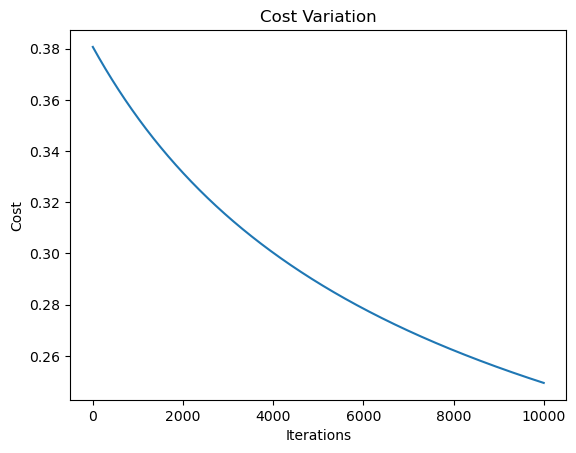


Evaluation:
Accuracy : 0.944
Precision: 0.833
Recall   : 0.833
F1-score : 0.833
Confusion Matrix (TP, FP, FN, TN): (np.int64(10), np.int64(2), np.int64(2), np.int64(58))


In [55]:
beta0 = np.random.randn()
beta1 = np.random.randn()

lr = 0.001
n_iter = 10000
cost_history = []

for i in range(n_iter):
    # z = β0 + β1 * x
    z = beta0 + beta1 * X.flatten()
    y_hat = sigmoid(z)

    # gradients
    dJ_dbeta0, dJ_dbeta1 = compute_gradients(X, y, y_hat)

    # update
    beta0 = beta0 - lr * dJ_dbeta0
    beta1 = beta1 - lr * dJ_dbeta1

    # cost
    cost = compute_cost(y_hat, y)
    cost_history.append(cost)

    if i % 1000 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

print(f"\nFinal β0 = {beta0:.4f}, β1 = {beta1:.4f}")

# =========================
# 4) Plot cost
# =========================
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# =========================
# 5) Evaluation
# =========================
def predict(X, beta0, beta1, threshold=0.5):
    z = beta0 + beta1 * X.flatten()
    y_hat = sigmoid(z)
    return (y_hat >= threshold).astype(int)

y_pred = predict(X, beta0, beta1)

# Metrics
def confusion_matrix_binary(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, fp, fn, tn

def precision_recall_f1_accuracy(y_true, y_pred):
    tp, fp, fn, tn = confusion_matrix_binary(y_true, y_pred)
    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall    = tp / (tp + fn) if (tp + fn) else 0.0
    accuracy  = (tp + tn) / (tp + tn + fp + fn)
    f1        = (2*precision*recall / (precision + recall)) if (precision + recall) else 0.0
    return precision, recall, f1, accuracy, (tp, fp, fn, tn)

prec, rec, f1, acc, (tp, fp, fn, tn) = precision_recall_f1_accuracy(y, y_pred)

print("\nEvaluation:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"Confusion Matrix (TP, FP, FN, TN): {(tp, fp, fn, tn)}")
